# How To: Compute LO cross sections for a given SLHA file

In [1]:
# Set up the path to SModelS installation folder
import sys; sys.path.append("."); import smodels_paths

In [2]:
# Import those parts of smodels that are needed for this exercise
from smodels.tools import xsecComputer
from smodels.tools.physicsUnits import TeV, fb
from smodels.installation import installDirectory
from smodels.tools.xsecComputer import LO, NLL

In [3]:
# Define the SLHA file name
filename="inputFiles/slha/gluino_squarks.slha"

In [4]:
# Now lets compute the leading order (LO) cross sections for 8 TeV, simulating 1000
# events with pythia.
computer= xsecComputer.XSecComputer ( maxOrder = LO, nevents = 1000, pythiaVersion=6 )
xsecs=computer.compute(sqrts = 8*TeV, slhafile=filename )

In [5]:
# the output is a XSectionList ...
type(xsecs)

smodels.theory.crossSection.XSectionList

In [6]:
# Each entry in the list contains the cross-section value:
print(xsecs[0].value)
# The PDGs of the particles produced:
print(xsecs[0].pid)
# And some additional info
print("label =",xsecs[0].info.label,"Sqrts =",xsecs[0].info.sqrts, "QCD order =",xsecs[0].info.order)

8.48E-02 [pb]
(1000023, 1000024)
label = 8 TeV (LO) Sqrts = 8.00E+00 [TeV] QCD order = 0


In [7]:
# It is also possible to convert everything to a dictionary, using the .getDictionary() method:
xsecDic=xsecs.getDictionary(groupBy="labels")["8 TeV (LO)"]
print (xsecDic[(1000001,1000021)] )

9.20E-03 [pb]


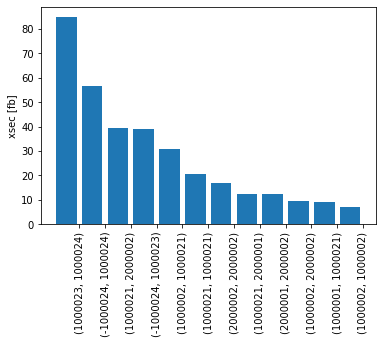

In [8]:
# now lets make a simple bar chart of the first 12 cross sections, in fb
xsecPlot = dict(list(xsecDic.items())[:12])
from IPython import get_ipython
%matplotlib inline
import pylab; import numpy; pylab.bar( range(len(xsecPlot)), list ( map ( lambda x: float(x/fb), xsecPlot.values() ) ) )
pylab.xticks( .5+ numpy.arange(len(xsecPlot)), xsecPlot.keys(), rotation="vertical" ); pylab.ylabel( "xsec [fb]");

In [9]:
# Finally, lets write the cross-sections back to the file 
# (will write only the cross-sections not overlapping the existing ones):
computer.addXSecToFile(xsecs,filename)

True